# Hotel reservation analysis

Start from loading libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Then load data

In [3]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

Inspect data

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Dictionary
_Note: For binary variables: `1` = true and `0` = false._

| Column                                                                                                                                                                                                          | Explanation                                                                                                                            |   |   |   |
|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| is_canceled                                                                                                                                                                                                     | Binary variable indicating whether a booking was canceled                                                                              |   |   |   |
| lead_time                                                                                                                                                                                                       | Number of days between booking date and arrival date                                                                                   |   |   |   |
| arrival_date_week_number, arrival_date_day_of_month, arrival_date_month                                                                                                                                         | Week number, day date, and month number of arrival date                                                                                |   |   |   |
| stays_in_weekend_nights, stays_in_week_nights                                                                                                                                                                   | Number of weekend nights (Saturday and Sunday) and weeknights (Monday to Friday) the customer booked                                   |   |   |   |
| adults, children, babies                                                                                                                                                                                        | Number of adults, children, babies booked for the stay                                                                                 |   |   |   |
| is_repeated_guest                                                                                                                                                                                               | Binary variable indicating whether the customer was a repeat guest                                                                     |   |   |   |
| previous_cancellations                                                                                                                                                                                          | Number of prior bookings that were canceled by the customer                                                                            |   |   |   |
| previous_bookings_not_canceled                                                                                                                                                                                  | Number of prior bookings that were not canceled by the customer                                                                        |   |   |   |
| required_car_parking_spaces                                                                                                                                                                                     | Number of parking spaces requested by the customer                                                                                     |   |   |   |
| total_of_special_requests                                                                                                                                                                                       | Number of special requests made by the customer                                                                                        |   |   |   |
| avg_daily_rate                                                                                                                                                                                                  | Average daily rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights                   |   |   |   |
| booked_by_company                                                                                                                                                                                               | Binary variable indicating whether a company booked the booking                                                                        |   |   |   |
| booked_by_agent                                                                                                                                                                                                 | Binary variable indicating whether an agent booked the booking                                                                         |   |   |   |
| hotel_City                                                                                                                                                                                                      | Binary variable indicating whether the booked hotel is a "City Hotel"                                                                  |   |   |   |
| hotel_Resort                                                                                                                                                                                                    | Binary variable indicating whether the booked hotel is a "Resort Hotel"                                                                |   |   |   |
| meal_BB                                                                                                                                                                                                         | Binary variable indicating whether a bed & breakfast meal was booked                                                                   |   |   |   |
| meal_HB                                                                                                                                                                                                         | Binary variable indicating whether a half board meal was booked                                                                        |   |   |   |
| meal_FB                                                                                                                                                                                                         | Binary variable indicating whether a full board meal was booked                                                                        |   |   |   |
| meal_No_meal                                                                                                                                                                                                    | Binary variable indicating whether there was no meal package booked                                                                    |   |   |   |
| market_segment_Aviation, market_segment_Complementary, market_segment_Corporate, market_segment_Direct, market_segment_Groups, market_segment_Offline_TA_TO, market_segment_Online_TA, market_segment_Undefined | Indicates market segment designation with a value of 1. "TA"= travel agent, "TO"= tour operators                                       |   |   |   |
| distribution_channel_Corporate, distribution_channel_Direct, distribution_channel_GDS, distribution_channel_TA_TO, distribution_channel_Undefined                                                               | Indicates booking distribution channel with a value of 1. "TA"= travel agent, "TO"= tour operators, "GDS" = Global Distribution System |   |   |   |
| reserved_room_type_A, reserved_room_type_B, reserved_room_type_C, reserved_room_type_D, reserved_room_type_E, reserved_room_type_F, reserved_room_type_G, reserved_room_type_H, reserved_room_type_L            | Indicates code of room type reserved with a value of 1. Code is presented instead of designation for anonymity reasons                 |   |   |   |
| deposit_type_No_Deposit                                                                                                                                                                                         | Binary variable indicating whether a deposit was made                                                                                  |   |   |   |
| deposit_type_Non_Refund                                                                                                                                                                                         | Binary variable indicating whether a deposit was made in the value of the total stay cost                                              |   |   |   |
| deposit_type_Refundable                                                                                                                                                                                         | Binary variable indicating whether a deposit was made with a value under the total stay cost                                           |   |   |   |
| customer_type_Contract                                                                                                                                                                                          | Binary variable indicating whether the booking has an allotment or other type of contract associated to it                             |   |   |   |
| customer_type_Group                                                                                                                                                                                             | Binary variable indicating whether the booking is associated to a group                                                                |   |   |   |
| customer_type_Transient                                                                                                                                                                                         | Binary variable indicating whether the booking is not part of a group or contract, and is not associated to other transient booking    |   |   |   |
| customer_type_Transient-Party                                                                                                                                                                                   | Binary variable indicating whether the booking is transient, but is associated to at least another transient booking                   |   |   |   |

****************************

to make good decisions let's have a closer look about each column in data and try to find relationships with other ones

In [47]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

*********************************

lead_time which indicates number of days between booking date and arrival date, sprawdźmy czy klienci dokonują rezerwacji na ostatnią chwilę

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lead_time', ylabel='Count'>

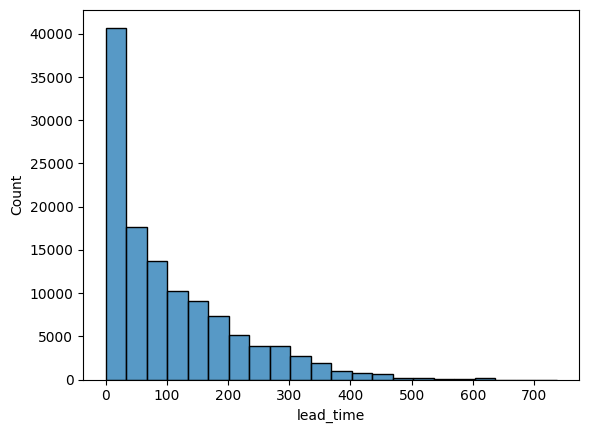

In [61]:
sns.histplot(data=df['lead_time'], bins=22)

duży peak na początku wykresu świadczy o wykonywaniu rezerwacji przez klientów na ostatnią chwilę, sprawdźmy jak się to ma kolumny `hotel` mówiącej o rodzaju hotelu `Resort` vs `City`

<Axes: xlabel='hotel', ylabel='lead_time'>

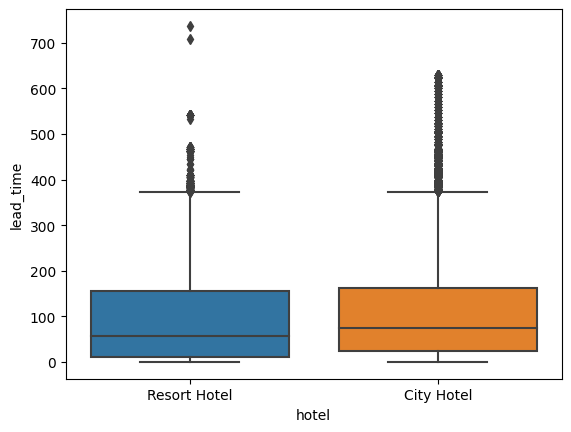

In [62]:
sns.boxplot(data=df, x='hotel', y='lead_time')

z większym wyprzedzeniem klienci rezerwowali pobyt w miejskich hotelach, z mniejszym w wypoczynkowych

************************

spójrzmy teraz na daty przybycia do hoteli, można się tu rozejrzeć za ciekawymi wnioskami, analiza w kontekście anulowania rezerwacji może być przydatna do identyfikacji sezonowości i wzorców czasowych

aby łatwiej było określić w jakich porach roku dokonuje się rezerwacji stwórzmy kolumnę `seasons` i dopasujmy porę roku do daty rezerwacji

In [77]:
def assign_season(week_number):
    if week_number <= 12:
        return 'Winter'
    elif 13 <= week_number <= 25:
        return 'Spring'
    elif 26 <= week_number <= 38:
        return 'Summer'
    elif 39 <= week_number <= 50:
        return 'Autumn'
    else:
        return 'Winter'

In [78]:
df['season'] = df['arrival_date_week_number'].apply(assign_season)

In [80]:
df['season'].value_counts()

season
Summer    35814
Spring    33874
Autumn    25048
Winter    24654
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

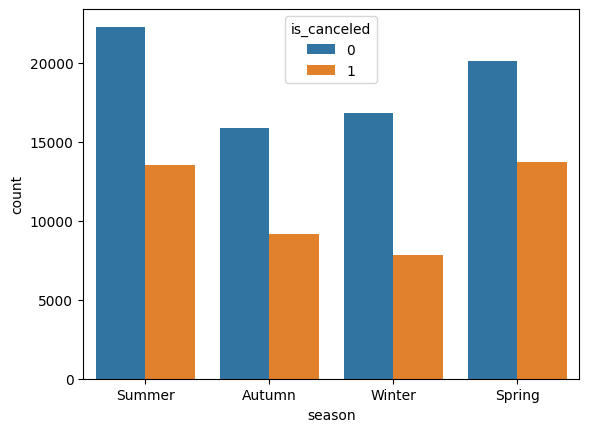

In [83]:
sns.countplot(data=df, x='season', hue='is_canceled')

jak można zaobserwować najwięcej rezerwacji wykonywane jest w sezonach letnim i wiosennym tak samo z anulowaniem rezerwacji, co ciekawe najmniej anulowanych rezerwacji jest w sezonie zimowym, w którym jak wiemy zawiera się okres ferii

<Axes: >

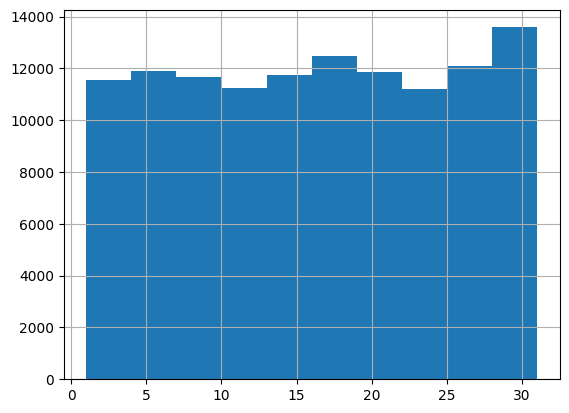

In [7]:
df['arrival_date_day_of_month'].hist()

In [8]:
df['arrival_date_month_dt'] = pd.Categorical(df['arrival_date_month'],
                                            categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                                            ordered=True)

In [130]:
arrival_month = df.groupby(['arrival_date_month_dt', 'is_canceled'])['is_canceled'].count().unstack()

<ipython-input-130-f6daa4358e1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrival_month = df.groupby(['arrival_date_month_dt', 'is_canceled'])['is_canceled'].count().unstack()


<Axes: ylabel='arrival_date_month_dt'>

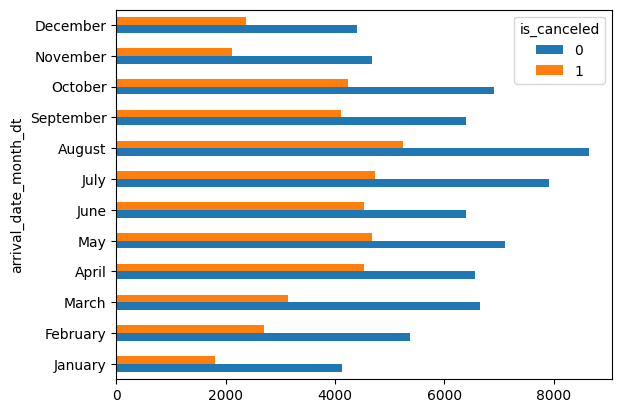

In [152]:
arrival_month.plot(kind='barh')

powyżej wykres szczegółowy rozbijający anulowanie rezerwacji na miesiące

In [159]:
sns.heatmap(data=df, x='arrival_date_week_number', y='arrival_date_month')

ValueError: could not convert string to float: 'Resort Hotel'

In [26]:
df['stays_in_weekend_nights'].value_counts()

stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64